In [1]:
from gscore.fdr import GlobalDistribution

In [12]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/protein.test"

In [13]:
global_model = GlobalDistribution.load(model_path)

In [14]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

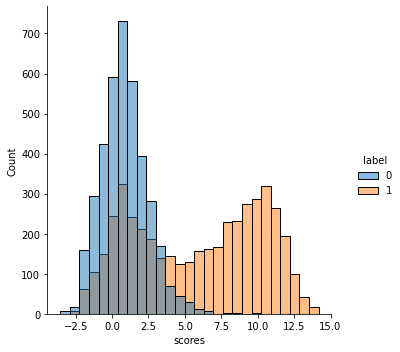

In [15]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [16]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [17]:
function_check

,label,scores,type
0,-2.000000,1.324682e-09,Target
1,-1.995996,1.488587e-09,Target
2,-1.991992,1.672134e-09,Target
3,-1.987988,1.877598e-09,Target
4,-1.983984,2.107507e-09,Target
...,...,...,...
995,1.983984,2.139400e-08,Target
996,1.987988,1.925634e-08,Target
997,1.991992,1.732595e-08,Target
998,1.995996,1.558338e-08,Target


In [18]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

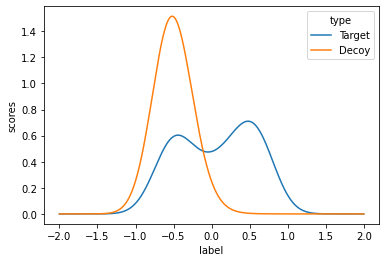

In [19]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [20]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00464237, 0.        , 0.        , ..., 0.00895878, 0.00228221,
       0.0053689 ])